### About the data set  (Concrete_Data.csv data)

The data set contains information about the Cement strength and the different features that influence the strength of the cement.

Features

**cement :** amount of cement

**Blast :** amount of BlastFurnaceSlag

**Fly Ash :** amount of FlyAsh

**Water :**  amount of Water

**Superplasticizer :**  amount of Superplasticizer

**CA  :** amount of CoarseAggregate

**FA  :** amount of FineAggregate

**Age  :** age of concrete construction

Response

**CMS  :** Compressive strength of concrete construction

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
3. **[Model Building](#MB)**
4. **[Assumptions of Linear Regression](#AoLR)**
5. **[Feature Engineering](#FE)**

<a id="lib"> </a>
## 1. Import Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### Load the Concrete_Data dataset and display the first five records 

In [2]:
# load the csv file
# store the data in 'concrete_data'
concrete_data = pd.read_csv('Concrete_Data.csv')

# display first five observations using head()
concrete_data.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.000000,0.000000,0.000000,162.000000,2.500000,1040.000000,676.000000,28,79.990000
1,540.000000,0.000000,0.000000,162.000000,2.500000,1055.000000,676.000000,28,61.890000
2,332.500000,142.500000,0.000000,228.000000,0.000000,932.000000,594.000000,270,40.270000
3,332.500000,142.500000,0.000000,228.000000,0.000000,932.000000,594.000000,365,41.050000
4,198.600000,132.400000,0.000000,192.000000,0.000000,978.400000,825.500000,360,44.300000


<a id="prep"> </a>
## 2. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Check whether there is any missing value in the dataset.Adopt necessary steps to impute the missing values </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# use 'info()' to understand the dataset
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement              1030 non-null float64
Blast               1030 non-null float64
Fly Ash             1030 non-null float64
Water               1030 non-null float64
Superplasticizer    1030 non-null float64
CA                  1030 non-null float64
FA                  1030 non-null float64
Age                 1030 non-null int64
CMS                 1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
# use 'shape' to check the dimension of data
concrete_data.shape

(1030, 9)

In [6]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = concrete_data.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (concrete_data.isnull().sum()*100/concrete_data.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
CMS,0,0.000000
Age,0,0.000000
FA,0,0.000000
CA,0,0.000000
Superplasticizer,0,0.000000
Water,0,0.000000
Fly Ash,0,0.000000
Blast,0,0.000000
Cement,0,0.000000


Interpretation: There are no missing values in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Store the Dependant data seperately </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
target = concrete_data['CMS']
target

0      79.990000
1      61.890000
2      40.270000
3      41.050000
4      44.300000
5      47.030000
6      43.700000
7      36.450000
8      45.850000
9      39.290000
10     38.070000
11     28.020000
12     43.010000
13     42.330000
14     47.810000
15     52.910000
16     39.360000
17     56.140000
18     40.560000
19     42.620000
20     41.840000
21     28.240000
22      8.060000
23     44.210000
24     52.520000
25     53.300000
26     41.150000
27     52.120000
28     37.430000
29     38.600000
30     55.260000
31     52.910000
32     41.720000
33     42.130000
34     53.690000
35     38.410000
36     30.080000
37     37.720000
38     42.230000
39     36.250000
40     50.460000
41     43.700000
42     39.000000
43     53.100000
44     41.540000
45     35.080000
46     15.050000
47     40.760000
48     26.260000
49     32.820000
50     39.780000
51     46.930000
52     33.120000
53     49.190000
54     14.590000
55     14.640000
56     41.930000
57      9.130000
58     50.9500

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Check whether there is any outlier in the dataset.Adopt necessary steps to treat the outliers </b>
                </font>
            </div>
        </td>
    </tr>
</table>

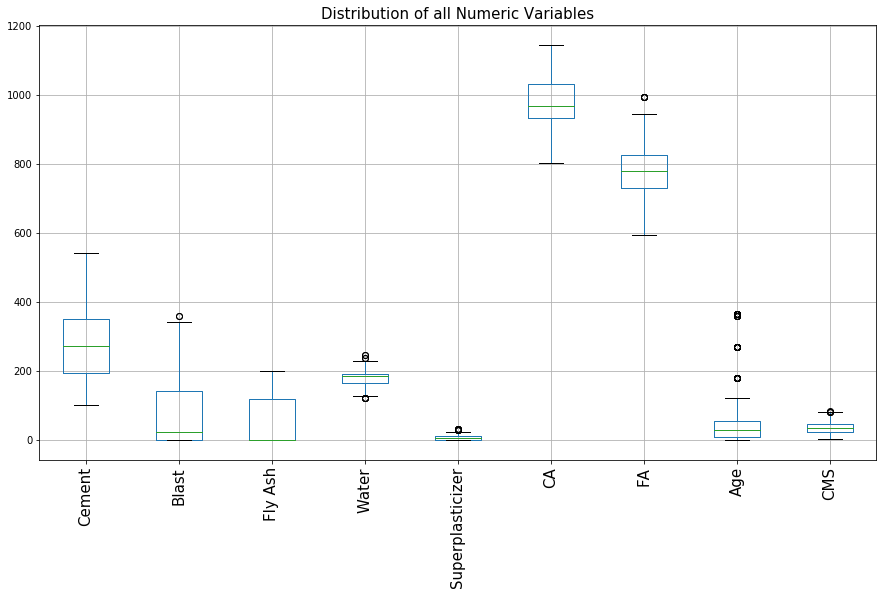

In [9]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
concrete_data.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

Cement, Blast, Water , Superplastizer,FA,Age and CMS have outliers because there are datapoints which are beyond upper limit can be seen

Let us use the IQR method to remove the outliers.

In [26]:
# calculate the first quartile
Q1 = concrete_data.quantile(0.25)

# calculate the third quartile
Q3 = concrete_data.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
concrete_data = concrete_data[~((concrete_data < (Q1 - 1.5 * IQR)) | (concrete_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
concrete_data.shape

(941, 9)

**Interpretation:** A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

<a id="MB"> </a>
## 3. Model Building

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build the Linear regression model using OLS. See the F-stat, p-value and each feature p-value </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In MLR we test the hypothesis 
H0: beta1 = 0, beta2 = 0,..., betap = 0, which says that there is no useful linear relationship 
between y and any of the p predictors. If at least one of these betas is not 0, the model is deemed useful.

We could test each beta separately, but that would take time and be very conservative (if Bonferroni correction is used). 
A better test is a joint test, and is based on a statistic that has an F distribution when H0 is true

Null hypothesis: H0: b1 = b2 = … = bp = 0
        
Alternative hypothesis: Ha: at least one bi ≠ 0 (i = 1,..., p)

In [75]:
# load the csv file
# store the data in 'concrete_data'
concrete_data = pd.read_csv('Concrete_Data.csv')

# display first five observations using head()
concrete_data.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.000000,0.000000,0.000000,162.000000,2.500000,1040.000000,676.000000,28,79.990000
1,540.000000,0.000000,0.000000,162.000000,2.500000,1055.000000,676.000000,28,61.890000
2,332.500000,142.500000,0.000000,228.000000,0.000000,932.000000,594.000000,270,40.270000
3,332.500000,142.500000,0.000000,228.000000,0.000000,932.000000,594.000000,365,41.050000
4,198.600000,132.400000,0.000000,192.000000,0.000000,978.400000,825.500000,360,44.300000


In [68]:
# split the independent and target variable into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(concrete_data.drop('CMS',axis=1), concrete_data['CMS'], 
                                                    random_state=1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train_slr', X_train_slr.shape)
print('y_train_slr', y_train_slr.shape)

# print dimension of test set
print('X_test_slr', X_test_slr.shape)
print('y_test_slr', y_test_slr.shape)

X_train_slr (721, 8)
y_train_slr (721,)
X_test_slr (309, 8)
y_test_slr (309,)


In [69]:
# convert the X_train to DataFrame
X_train_slr = pd.DataFrame(X_train_slr)

# insert a column of intercept to 'X_train_slr'
# create an array of ones with length equal to the total number of observations
c = np.ones(X_train_slr.shape[0])

# A design matrix is a matrix of observations of independent variables whose first column is of ones
# If there are 'm' observations and 'n' variables, then the dimension of a design matrix is m * (n+1) 

# add the intercept 
# pass location index of intercept to the parameter 'loc'
# pass column name to the parameter 'column'
# pass the column value to the parameter 'value'
X_train_slr.insert(loc = 0, column = 'intercept', value = c)

# display the first five rows of design matrix
X_train_slr.head()

,intercept,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
185,1.000000,222.400000,0.000000,96.700000,189.300000,4.500000,967.100000,870.300000,14
286,1.000000,181.400000,0.000000,167.000000,169.600000,7.600000,1055.600000,777.800000,28
600,1.000000,339.000000,0.000000,0.000000,197.000000,0.000000,968.000000,781.000000,14
691,1.000000,212.000000,141.300000,0.000000,203.500000,0.000000,973.400000,750.000000,3
474,1.000000,446.000000,24.000000,79.000000,162.000000,10.300000,967.000000,712.000000,28


In [70]:
# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train_slr, X_train_slr).fit()

# print the summary output
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CMS   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     159.0
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          6.89e-153
Time:                        22:58:08   Log-Likelihood:                -2692.2
No. Observations:                 721   AIC:                             5402.
Df Residuals:                     712   BIC:                             5444.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept          -13.3563     29.865  

Interpretation: The R-squared value obtained from this model is 64.1 which means that the above model explains 64.1% of the variation in the CMS.

The Durbin-Watson test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the test statistic is close to 2 (= 1.890) which means there is almost no autocorrelation.

The Jarque-Bera test is used to check the normality of the residuals. Here, the p-value (=0.00) of the test is less than 0.05; that implies the residuals are not normally distributed.

The 'Cond. No' (= 1.02e+05) represents the Condition Number (CN) which is used to check the multicollinearity.

If CN < 100: no multicollinearity
If CN is between 100 and 1000: moderate multicollinearity
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is severe multicollinearity in the data.

Prob (F-statistic) - F-statistic tells us the goodness of fit of regression. You want the probability of F-statistic to be as low as possible to reject the null hypothesis. the value is very low = 6.89e-153 so we can reject the null hypothesis

P-value is given in the column P>|t| – As mentioned above, for a good model, we want this value to be less than the significance level.

except CA and FA , p values of each predictor is less than 0.05 (significance value), which is also enough to be a good model where null hypothesis can be rejected

<a id="AoLR"> </a>
## 4. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Check whether there is Multi-collinarity in the dataset.Adopt necessary steps to treat the Multi-collinarity </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us plot the heatmap to visualize the correlation matrix of the independent variables. The variables with a high correlation may induce multicollinearity in the data.

In [51]:
features = concrete_data.iloc[:,0:8]
features

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.000000,0.000000,0.000000,162.000000,2.500000,1040.000000,676.000000,28
1,540.000000,0.000000,0.000000,162.000000,2.500000,1055.000000,676.000000,28
2,332.500000,142.500000,0.000000,228.000000,0.000000,932.000000,594.000000,270
3,332.500000,142.500000,0.000000,228.000000,0.000000,932.000000,594.000000,365
4,198.600000,132.400000,0.000000,192.000000,0.000000,978.400000,825.500000,360
5,266.000000,114.000000,0.000000,228.000000,0.000000,932.000000,670.000000,90
6,380.000000,95.000000,0.000000,228.000000,0.000000,932.000000,594.000000,365
7,380.000000,95.000000,0.000000,228.000000,0.000000,932.000000,594.000000,28
8,266.000000,114.000000,0.000000,228.000000,0.000000,932.000000,670.000000,28
9,475.000000,0.000000,0.000000,228.000000,0.000000,932.000000,594.000000,28


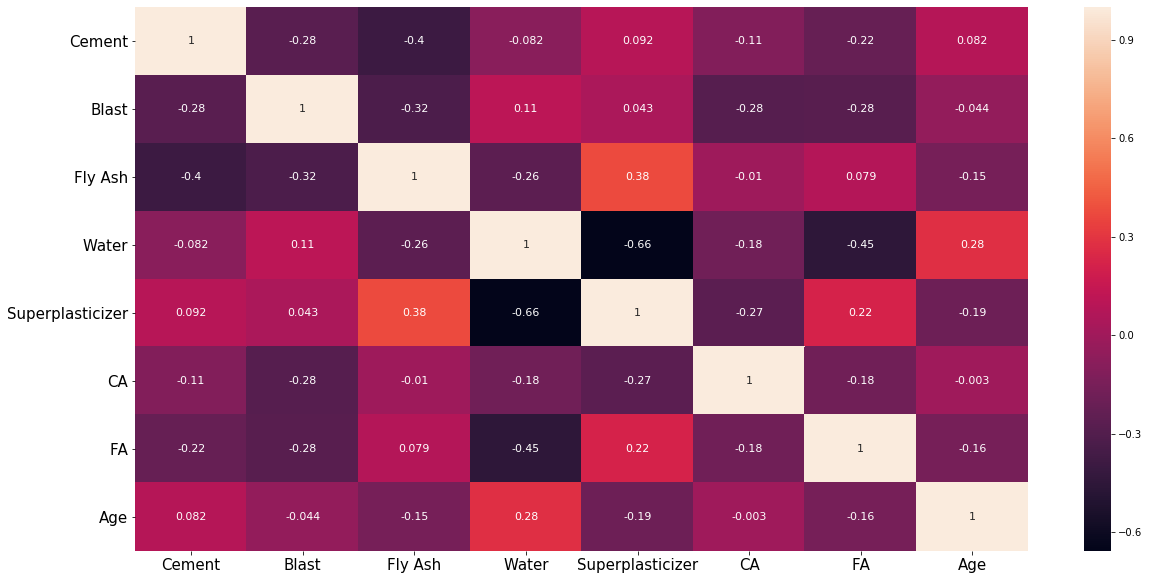

In [52]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation features = concrete_data.iloc[:,0:8]
# annot: prints the correlation values in the chart
# annot_kws: used to set the font size of the annotation
sns.heatmap(features.corr(), annot = True, annot_kws = {"size": 11})

# rotation = 'horizontal' rotates the y-axis labels horizontally
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

Identify the variables with a correlation greater than 0.6 and less than -0.6.

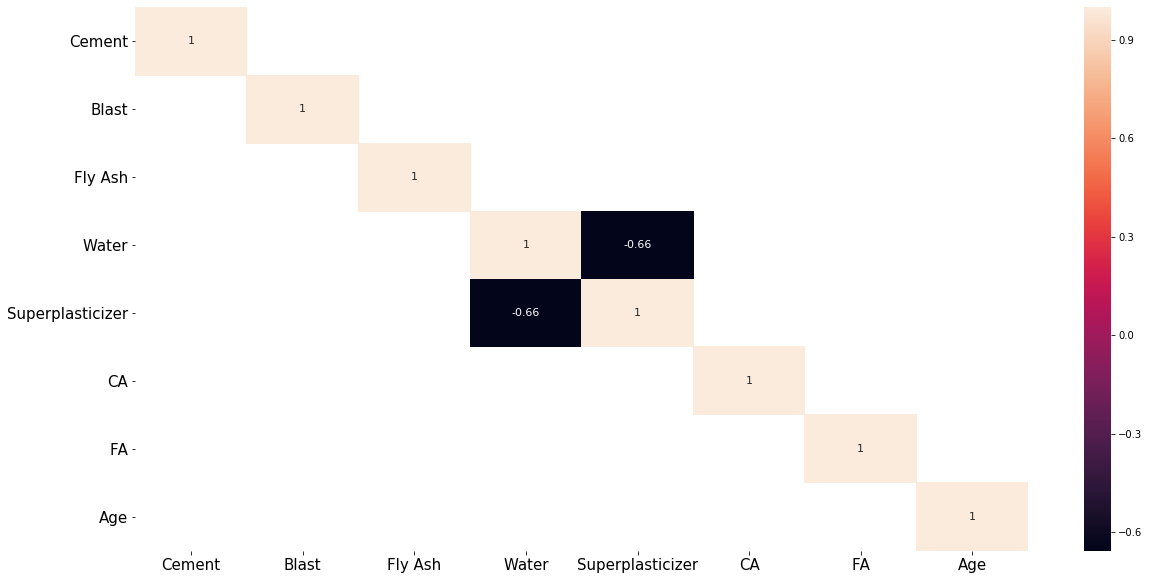

In [53]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(features.corr()[np.abs(features.corr()) > 0.6], annot = True, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The above heatmap, show the variables Superplasticizer and Water have strong negative correlation. this gives indication that multicollinearity might be present in the dataset which shouod be removed

The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity between the features. The value of VIF equal to 1 indicates that no features are correlated. We calculate VIF of the numerical independent variables.   

Steps to calculate VIF:<br>
1. Regress one independent variable (say V<sub>i</sub>) on all the remaining independent variables (say V<sub>j</sub>, j ≠ i)
2. Calculate R-squared of the regression model
3. Calculate VIF for the variable V<sub>i</sub> using the formula:
<p style='text-indent:29em'> <strong> VIF = 1 / (1 - R-squared)</strong>  </p><br>
4. Repeate the steps 1 to 3 to calculate VIF of each independent variable

#### Calculate the VIF for each numeric variable.

In [54]:
features_vif=features

In [55]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(features_vif.values, i) for i in range(features_vif.shape[1])]

# create a column of variable names
vif["Features"] = features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,84.955779,CA
1,82.157569,Water
2,72.790995,FA
3,15.456717,Cement
4,5.471094,Superplasticizer
5,4.147833,Fly Ash
6,3.329127,Blast
7,1.699459,Age


The output shows that the variable 'CA ' has the highest VIF. Now, we use the `for loop` to find VIF and remove the variables with VIF greater than 10. We set the threshold to 10, as we wish to remove the variable for which the remaining variables explain more than 90% of the variation. One can choose the threshold  other than 10. (it depends on the business requirements)

In [57]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(features_vif.values, i) for i in range(features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        features_vif = features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor          Features
0    2.819482            Cement
1    1.526264             Blast
2    1.879115           Fly Ash
3    2.921784  Superplasticizer
4    1.550374               Age


In [77]:
# display the first 5 observations
features_vif.head()

,Cement,Blast,Fly Ash,Superplasticizer,Age
0,540.000000,0.000000,0.000000,2.500000,28
1,540.000000,0.000000,0.000000,2.500000,28
2,332.500000,142.500000,0.000000,0.000000,270
3,332.500000,142.500000,0.000000,0.000000,365
4,198.600000,132.400000,0.000000,0.000000,360


In [78]:
features_vif.shape

(1030, 5)

**Interpretation** Now, we have all the variables with VIF less than 10. So, we can conclude that there is no multicollinearity in the data.<br>
We will use the above dataframe "features_vif" to build the MLR model with significant variables.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a linear Regression model on the dataset after removing multicollinearity </b>
                </font>
            </div>
        </td>
    </tr>
</table>

We use the OLS technique to predict the CMS by considering all the independent features in the data. 

In [82]:
# split the independent and target variable into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_slr_vif, X_test_slr_vif, y_train_slr, y_test_slr = train_test_split(features_vif, target, 
                                                    random_state=1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train_slr_vif', X_train_slr_vif.shape)
print('y_train_slr', y_train_slr.shape)

# print dimension of test set
print('X_test_slr_vif', X_test_slr_vif.shape)
print('y_test_slr', y_test_slr.shape)

X_train_slr_vif (721, 5)
y_train_slr (721,)
X_test_slr_vif (309, 5)
y_test_slr (309,)


In [83]:
# convert the X_train to DataFrame
X_train_slr = pd.DataFrame(X_train_slr_vif)

# insert a column of intercept to 'X_train_slr'
# create an array of ones with length equal to the total number of observations
c = np.ones(X_train_slr_vif.shape[0])

# A design matrix is a matrix of observations of independent variables whose first column is of ones
# If there are 'm' observations and 'n' variables, then the dimension of a design matrix is m * (n+1) 

# add the intercept 
# pass location index of intercept to the parameter 'loc'
# pass column name to the parameter 'column'
# pass the column value to the parameter 'value'
X_train_slr_vif.insert(loc = 0, column = 'intercept', value = c)

# display the first five rows of design matrix
X_train_slr_vif.head()

,intercept,Cement,Blast,Fly Ash,Superplasticizer,Age
185,1.000000,222.400000,0.000000,96.700000,4.500000,14
286,1.000000,181.400000,0.000000,167.000000,7.600000,28
600,1.000000,339.000000,0.000000,0.000000,0.000000,14
691,1.000000,212.000000,141.300000,0.000000,0.000000,3
474,1.000000,446.000000,24.000000,79.000000,10.300000,28


In [84]:
# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
MLR_model_vif = sm.OLS(y_train_slr, X_train_slr_vif).fit()

# print the summary output
print(MLR_model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:                    CMS   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     220.3
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          4.21e-142
Time:                        23:42:39   Log-Likelihood:                -2725.6
No. Observations:                 721   AIC:                             5463.
Df Residuals:                     715   BIC:                             5491.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept          -13.9757      1.967  

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Check normality assumption for residue and if it is violoated, do the transformation on output variable </b>
                </font>
            </div>
        </td>
    </tr>
</table>

As per the assumptions of linear regression, residuals should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed, thus we check the normality only for the target variable.

The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:<br>

<p style='text-indent:25em'> <strong> H<sub>o</sub>:  Residuals are normally distributed </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  Residuals are not normally distributed </strong> </p>

In [87]:
# perform Shapiro Wilk test using 'shapiro()' from scipy library
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# 'resid' returns the residuals in the model
# pass the residuals to 'shapiro()'
stat, p_value = shapiro(MLR_model_vif.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9979636073112488
P-Value: 0.545931875705719


**Interpretation:** From the above test we can see that the p-value is 0.54 (greater than 0.05), thus we can say that the residuals are normally distributed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Check whether there is any Autocorreation in the dataset.Adopt necessary steps to treat the Autocorreation </b>
                </font>
            </div>
        </td>
    </tr>
</table>

We can check the correlation between the residuals using the `Durbin-Watson` test. The value of the test statistic ranges from 0 to 4. The test statistic value near to 2, represents no autocorrelation. The value of the test statistic between 0 and 2 implies positive autocorrelation and the value between 2 and 4 implies negative autocorrelation.

Print the summary of the model with significant variables to check the autocorrelation.

In [88]:
# print the model summary
print(MLR_model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:                    CMS   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     220.3
Date:                Fri, 11 Mar 2022   Prob (F-statistic):          4.21e-142
Time:                        00:11:12   Log-Likelihood:                -2725.6
No. Observations:                 721   AIC:                             5463.
Df Residuals:                     715   BIC:                             5491.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept          -13.9757      1.967  

**Interpretation:** From the above summary, we can observe that the value obtained from the `Durbin-Watson` test statistic is close to 2 (= 1.901). Thus, we conclude that there is no autocorrelation.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Check whether there is any homoscedasticity.Adopt necessary steps to treat the homoscedasticity </b>
                </font>
            </div>
        </td>
    </tr>
</table>

If the residuals have constant variance across different values of the predicted values, then it is known as `Homoskedasticity`. The absence of homoskedasticity is known as, heteroskedasticity. One of the assumptions of linear regression is that heteroskedasticity should not be present. Let us study two different tests to check the presence of  heteroskedasticity.

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.<br>
The test hypothesis for the Breusch-Pagan test is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>:  There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  There is a heteroscedasticity present in the data </strong> </p>

In [89]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(MLR_model_vif.resid, MLR_model_vif.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])

[('f-value', 17.34704202789784), ('p-value', 3.1479802016243846e-16)]

**Interpretation:** We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

<a id="FE"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Split the data into Train & Test data with a ratio of 70:30 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [92]:
# split the independent and target variable into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(concrete_data.drop('CMS',axis=1), concrete_data['CMS'], 
                                                    random_state=1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (721, 8)
y_train (721,)
X_test (309, 8)
y_test (309,)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build a Linear Regression model on the dataset and evaluate its performace using R-Square & Mean Square Error. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [101]:
# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# print the R-squared value for the model
# score() returns the R-squared value
MLR_model.score(X_train, y_train)

0.6411898137954829

In [107]:
# print training RMSE
print('MSE on train set: ', mean_squared_error(y_train, linreg.predict(X_train)))

MSE on train set:  102.53194750160517


In [109]:
# print test RMSE
print('MSE on test set: ', mean_squared_error(y_test, linreg.predict(X_test)))

MSE on test set:  120.18125557536798


In [110]:
from sklearn.metrics import r2_score
r2_score(y_test, linreg.predict(X_test))

0.5414805238935221

In [111]:
r2_score(y_train, linreg.predict(X_train))

0.6411898137954829

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Perform Backward elimination & identify the most suitable set of variables </b>
                </font>
            </div>
        </td>
    </tr>
</table>

This method considers the full model (model with all the predictors) in the first step. In the next steps start removing one variable at each step until we run out of the independent variables or the stopping rule is achieved.

The least significant variable (with the highest p-value) is removed at each step.

In [130]:
# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build backward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 8, forward = False,
                     verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

In [131]:
# print the selected feature names when k_features = 12
print('Features selelected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
('Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA', 'Age')

R-Squared:  0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Perform Forward Selection & identify the most suitable set of variables </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [117]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build forward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. Here '12' is the stopping rule
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator=linreg, k_features = 8, forward=True,
                     verbose=2, scoring='r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-03-11 01:21:12] Features: 1/8 -- score: 0.24216760422771336[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-03-11 01:21:13] Features: 2/8 -- score: 0.3645606157758704[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-03-11 01:21:13] Features: 3/8 -- score: 0.4953864801231167[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [118]:
# print the selected feature names when k_features = 12
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA', 'Age')

R-Squared:  0.6307134470651701


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [121]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True,
                     verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-03-11 01:30:09] Features: 1/8 -- score: 0.24216760422771336[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-03-11 01:30:09] Features: 2/8 -- score: 0.3645606157758704[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-03-11 01:30:09] Features: 3/8 -- score: 0.4953864801231167[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [122]:
# printing the selected feature names when k_features = 'best'
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'Age')

R-Squared:  0.6316259256615316


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Analyse, which model among Forward Selection , Backward Elimination & Recursive Feature Elimination model performs the best </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [125]:
from sklearn.feature_selection import RFE
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 8)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age'],
      dtype='object')


In [128]:
# store the X_train with significant variables in new_X_train
new_X_train = X_train[['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age']]

# initiate linear regression
linreg = LinearRegression()

# build the model using new_X_train and y_train
linreg.fit(X_train, y_train)

# check the score
linreg.score(new_X_train, y_train)

0.6411898137954829

amongst all Recursive Feature Elimination performs better as score is the best